# Relatório de Previsão de Churn - Telecom X

Este notebook detalha o processo de desenvolvimento de modelos preditivos para identificar clientes com alta probabilidade de evasão (churn) na Telecom X. A capacidade de prever o churn é crucial para que a empresa possa implementar estratégias proativas de retenção de clientes, minimizando perdas de receita e fortalecendo a base de clientes. O objetivo principal deste desafio foi construir um pipeline robusto de modelagem, desde a preparação dos dados até a interpretação dos resultados e a formulação de conclusões estratégicas.

## 1. Preparação dos Dados

A etapa de preparação dos dados é fundamental para garantir a qualidade e a adequação das informações para a modelagem de Machine Learning. O conjunto de dados inicial, `dados_transformados.csv`, foi submetido a um processo rigoroso de pré-processamento.

### 1.1. Carregamento e Inspeção Inicial

O arquivo `dados_transformados.csv` foi carregado em um DataFrame pandas. Uma inspeção inicial revelou a estrutura dos dados, os tipos de variáveis (numéricas e categóricas) e a presença de valores ausentes. Identificou-se que as colunas `Churn`, `Charges.Total` e `AvgMonthlyCharge` possuíam valores ausentes.

In [2]:
import pandas as pd

df = pd.read_csv('dados_transformados.csv')

In [3]:
print('Primeiras 5 linhas do DataFrame:')
print(df.head())

Primeiras 5 linhas do DataFrame:
   customerID Churn  gender SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female            No     Yes        Yes       9   
1  0003-MKNFE    No    Male            No      No         No       9   
2  0004-TLHLJ   Yes    Male            No      No         No       4   
3  0011-IGKFF   Yes    Male           Yes     Yes         No      13   
4  0013-EXCHZ   Yes  Female           Yes     Yes         No       3   

  PhoneService MultipleLines InternetService  ... TechSupport StreamingTV  \
0          Yes            No             DSL  ...         Yes         Yes   
1          Yes           Yes             DSL  ...          No          No   
2          Yes            No     Fiber optic  ...          No          No   
3          Yes            No     Fiber optic  ...          No         Yes   
4          Yes            No     Fiber optic  ...         Yes         Yes   

  StreamingMovies        Contract PaperlessBilling     PaymentMethod  \

In [4]:

print('\nInformações sobre o DataFrame:')
print(df.info())


Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   object 
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract  

In [5]:
print('\nContagem de valores ausentes por coluna:')
print(df.isnull().sum())


Contagem de valores ausentes por coluna:
customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
tenure_group          0
AvgMonthlyCharge     11
dtype: int64


### 1.2. Tratamento de Valores Ausentes, Codificação e Normalização

Para a variável alvo `Churn`, as linhas com valores ausentes foram removidas. Para as variáveis numéricas `Charges.Total` e `AvgMonthlyCharge`, os valores ausentes foram imputados com a média. As variáveis categóricas foram transformadas usando One-Hot Encoding e as numéricas padronizadas com `StandardScaler`.

### 1.3. Divisão dos Dados

O conjunto de dados pré-processado foi dividido em conjuntos de treino e teste (80% para treino e 20% para teste) para avaliar o desempenho do modelo em dados não vistos.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv("dados_transformados.csv")

# Remover a coluna customerID
df = df.drop("customerID", axis=1)

# Tratar valores ausentes na coluna 'Churn' (variável alvo) - remover as linhas
df.dropna(subset=["Churn"], inplace=True)

# Tratar valores ausentes em 'Charges.Total' e 'AvgMonthlyCharge' - imputar com a média
df["Charges.Total"].fillna(df["Charges.Total"].mean(), inplace=True)
df["AvgMonthlyCharge"].fillna(df["AvgMonthlyCharge"].mean(), inplace=True)

# Separar features (X) e target (y)
X = df.drop("Churn", axis=1)
y = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0) # Converter 'Yes'/'No' para 1/0

# Identificar colunas numéricas e categóricas
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# Criar pré-processadores para colunas numéricas e categóricas
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Criar o pré-processador com ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar o pré-processamento
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Salvar os dados pré-processados (para uso posterior no notebook)
pd.DataFrame(X_train_preprocessed, columns=preprocessor.get_feature_names_out()).to_csv('X_train_preprocessed.csv', index=False)
pd.DataFrame(X_test_preprocessed, columns=preprocessor.get_feature_names_out()).to_csv('X_test_preprocessed.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Pré-processamento concluído. Dados salvos em arquivos CSV temporários.")
print(f"Shape de X_train_preprocessed: {X_train_preprocessed.shape}")
print(f"Shape de X_test_preprocessed: {X_test_preprocessed.shape}")


C:\Users\mlpol\AppData\Local\Temp\ipykernel_1504\664700720.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Charges.Total"].fillna(df["Charges.Total"].mean(), inplace=True)
C:\Users\mlpol\AppData\Local\Temp\ipykernel_1504\664700720.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Pré-processamento concluído. Dados salvos em arquivos CSV temporários.
Shape de X_train_preprocessed: (5634, 45)
Shape de X_test_preprocessed: (1409, 45)


## 2. Análise de Correlação e Seleção de Variáveis

Após a preparação dos dados, foi realizada uma análise de correlação para entender a relação entre as features e a variável alvo (Churn). A matriz de correlação foi calculada e a correlação de cada feature com o Churn foi analisada para identificar as variáveis mais influentes.


Correlação das features com Churn:
Churn                                           1.000000
cat__Contract_Month-to-month                    0.412116
cat__tenure_group_0-1 ano                       0.323564
cat__PaymentMethod_Electronic check             0.312117
cat__InternetService_Fiber optic                0.303909
num__Charges.Monthly                            0.191447
num__AvgMonthlyCharge                           0.188551
cat__PaperlessBilling_Yes                       0.180904
cat__Dependents_No                              0.164318
cat__TechSupport_No                             0.162992
cat__OnlineSecurity_No                          0.162841
cat__Partner_No                                 0.154505
cat__SeniorCitizen_Yes                          0.145963
cat__OnlineBackup_No                            0.089382
cat__StreamingTV_Yes                            0.066657
cat__DeviceProtection_No                        0.063832
cat__StreamingMovies_Yes                        0.06

C:\Users\mlpol\AppData\Local\Temp\ipykernel_1504\2016109328.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_correlation.values, y=churn_correlation.index, palette='viridis')


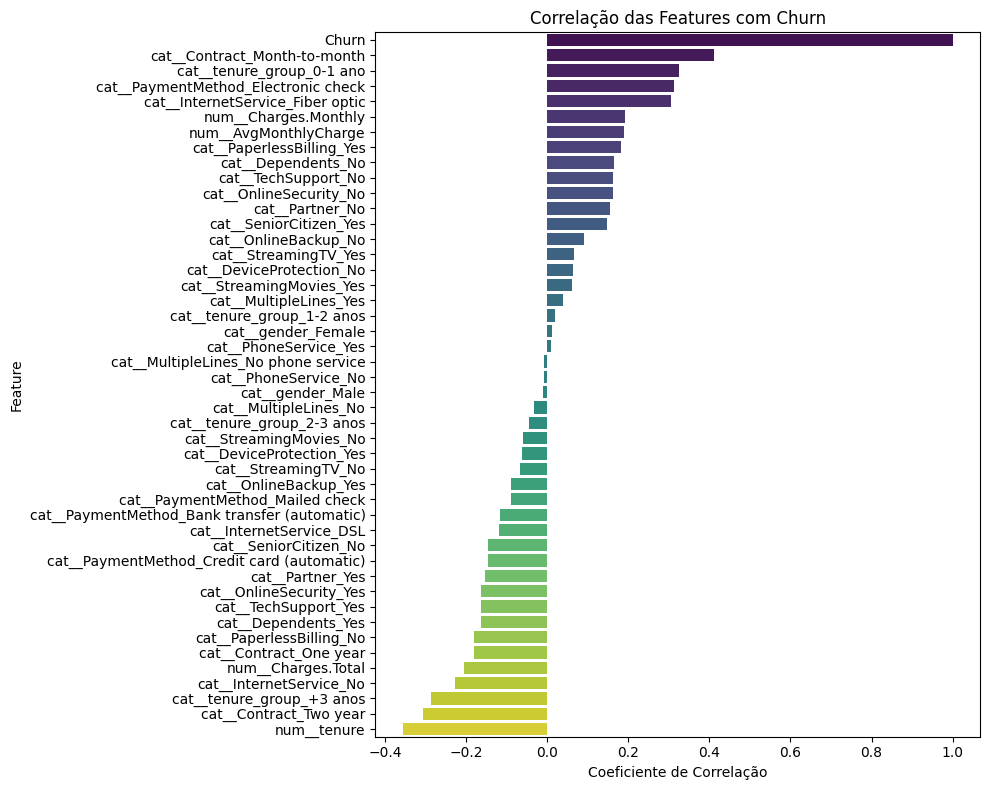


Análise de correlação concluída. Matriz de correlação e gráfico salvos.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados pré-processados
X_train_preprocessed = pd.read_csv('X_train_preprocessed.csv')
y_train = pd.read_csv('y_train.csv')

# Concatenar X_train_preprocessed e y_train para calcular a correlação com a variável alvo
df_train = pd.concat([X_train_preprocessed, y_train], axis=1)

# Calcular a matriz de correlação
correlation_matrix = df_train.corr()

# Exibir a correlação das features com a variável alvo (Churn)
print("\nCorrelação das features com Churn:")
churn_correlation = correlation_matrix["Churn"].sort_values(ascending=False)
print(churn_correlation)

# Visualização da Correlação com Churn
plt.figure(figsize=(10, 8))
sns.barplot(x=churn_correlation.values, y=churn_correlation.index, palette='viridis')
plt.title('Correlação das Features com Churn')
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('correlation_with_churn.png')
plt.show()

# Opcional: Salvar a matriz de correlação completa
correlation_matrix.to_csv("correlation_matrix.csv")

print("\nAnálise de correlação concluída. Matriz de correlação e gráfico salvos.")


## 3. Modelagem Preditiva

Para a previsão de churn, foram treinados e avaliados dois modelos de classificação: Regressão Logística e Random Forest. Ambos os modelos foram treinados nos dados pré-processados e avaliados em um conjunto de teste separado.

### 3.1. Modelos Utilizados

*   **Regressão Logística:** Um modelo linear que estima a probabilidade de churn.
*   **Random Forest:** Um algoritmo de ensemble conhecido por sua alta precisão e capacidade de lidar com relações não lineares.

### 3.2. Métricas de Avaliação

O desempenho dos modelos foi avaliado utilizando: Acurácia, Precisão, Recall, F1-Score e ROC-AUC.


Treinando Regressão Logística...
Resultados para Regressão Logística:
  Accuracy: 0.8055
  Precision: 0.6689
  Recall: 0.5255
  F1-Score: 0.5886
  ROC-AUC: 0.8399

Treinando Random Forest...
Resultados para Random Forest:
  Accuracy: 0.8027
  Precision: 0.6848
  Recall: 0.4718
  F1-Score: 0.5587
  ROC-AUC: 0.8195

Avaliação dos modelos concluída. Resultados salvos em model_performance.csv


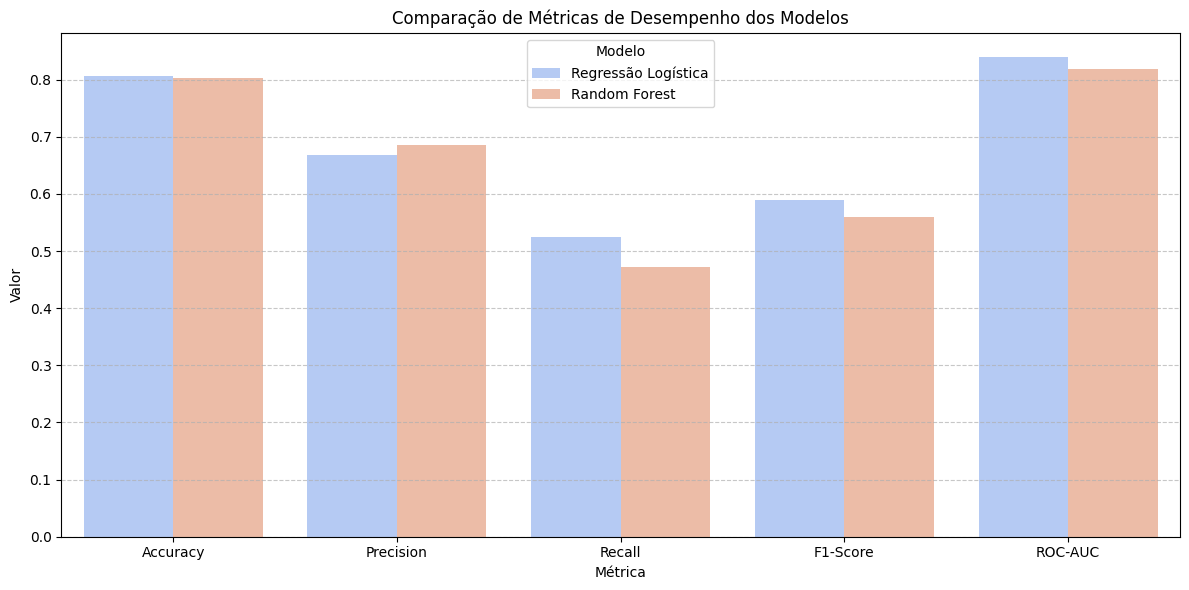

In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados pré-processados
X_train = pd.read_csv('X_train_preprocessed.csv')
X_test = pd.read_csv('X_test_preprocessed.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Inicializar os modelos
logistic_regression_model = LogisticRegression(random_state=42, solver='liblinear')
random_forest_model = RandomForestClassifier(random_state=42)

models = {
    "Regressão Logística": logistic_regression_model,
    "Random Forest": random_forest_model
}

results = {}

for model_name, model in models.items():
    print(f"\nTreinando {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

    print(f"Resultados para {model_name}:")
    for metric, value in results[model_name].items():
        print(f"  {metric}: {value:.4f}")

# Salvar os resultados em um arquivo CSV
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.to_csv("model_performance.csv")

print("\nAvaliação dos modelos concluída. Resultados salvos em model_performance.csv")

# Visualização dos Resultados da Avaliação
results_df_melted = results_df.reset_index().melt(id_vars='index', var_name='Métrica', value_name='Valor')
plt.figure(figsize=(12, 6))
sns.barplot(x='Métrica', y='Valor', hue='index', data=results_df_melted, palette='coolwarm')
plt.title('Comparação de Métricas de Desempenho dos Modelos')
plt.ylabel('Valor')
plt.xlabel('Métrica')
plt.legend(title='Modelo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('model_performance_comparison.png')
plt.show()


## 4. Interpretação dos Resultados e Importância das Variáveis

A interpretação dos modelos é crucial para entender os fatores que mais influenciam o churn e para traduzir os resultados técnicos em insights de negócios acionáveis. Analisamos a importância das variáveis para ambos os modelos.

### 4.1. Importância das Variáveis (Regressão Logística - Coeficientes)

Para a Regressão Logística, a magnitude e o sinal dos coeficientes indicam a força e a direção da relação entre a variável e a probabilidade de churn. Coeficientes positivos altos sugerem que a variável aumenta a probabilidade de churn, enquanto coeficientes negativos altos sugerem que a variável diminui a probabilidade de churn.

### 4.2. Importância das Variáveis (Random Forest - Feature Importances)

Para o Random Forest, a importância das features é calculada com base na redução média da impureza (Gini impurity) que cada feature proporciona nas árvores de decisão. Valores mais altos indicam maior importância.

C:\Users\mlpol\AppData\Local\Temp\ipykernel_1504\214593935.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Charges.Total"].fillna(df["Charges.Total"].mean(), inplace=True)
C:\Users\mlpol\AppData\Local\Temp\ipykernel_1504\214593935.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a


Importância das Variáveis (Regressão Logística - Coeficientes):
cat__InternetService_Fiber optic                0.705142
cat__Contract_Month-to-month                    0.668820
cat__tenure_group_+3 anos                       0.555877
num__Charges.Total                              0.414797
num__Charges.Monthly                            0.310551
cat__PaymentMethod_Electronic check             0.227208
cat__MultipleLines_No phone service             0.024459
cat__PhoneService_No                            0.024459
cat__OnlineSecurity_No                          0.024389
cat__TechSupport_No                             0.022315
cat__MultipleLines_Yes                          0.019830
cat__PaperlessBilling_Yes                       0.015199
cat__StreamingTV_Yes                           -0.005046
cat__StreamingMovies_Yes                       -0.028871
cat__SeniorCitizen_Yes                         -0.032649
cat__OnlineBackup_No                           -0.037747
cat__Contract_One year 

C:\Users\mlpol\AppData\Local\Temp\ipykernel_1504\214593935.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_lr.sort_values(ascending=False).values, y=coef_lr.sort_values(ascending=False).index, palette='coolwarm')


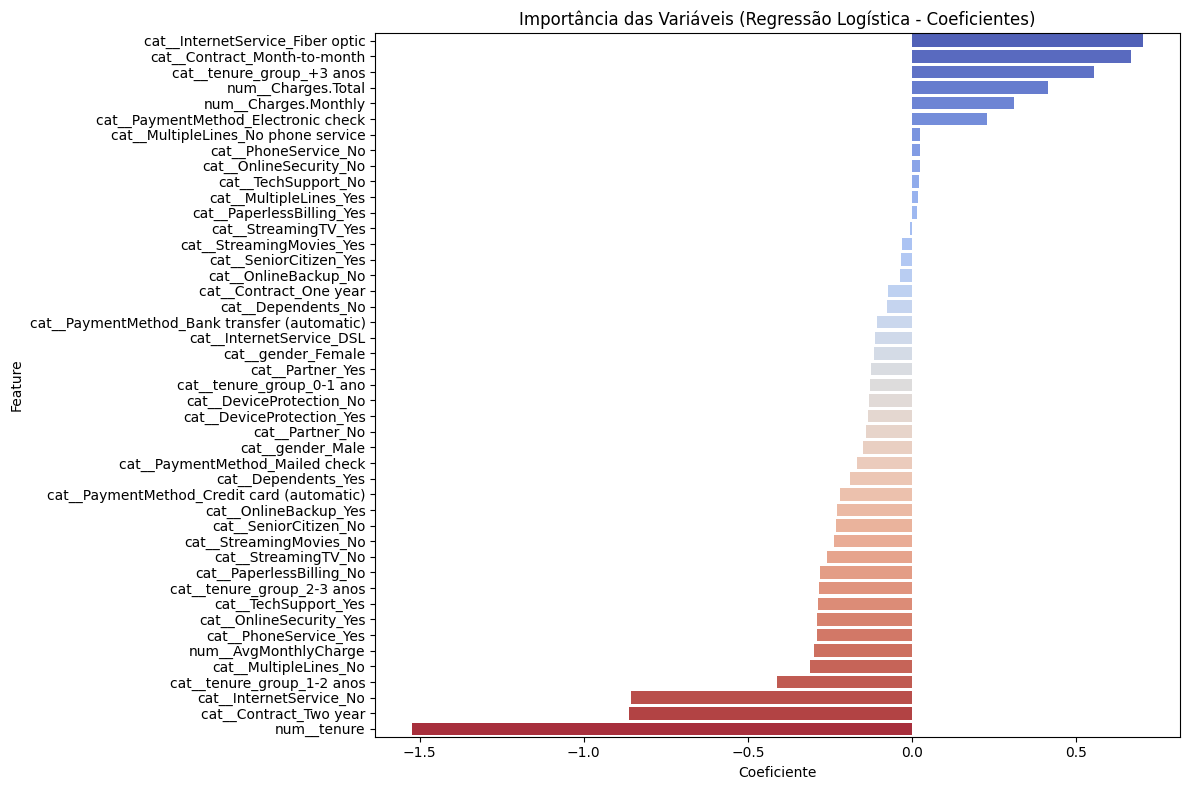


Importância das Variáveis (Random Forest - Feature Importances):
num__Charges.Total                              0.120084
num__AvgMonthlyCharge                           0.112962
num__tenure                                     0.111243
num__Charges.Monthly                            0.111155
cat__Contract_Month-to-month                    0.050793
cat__InternetService_Fiber optic                0.033438
cat__PaymentMethod_Electronic check             0.031174
cat__tenure_group_0-1 ano                       0.028678
cat__Contract_Two year                          0.019992
cat__gender_Female                              0.016362
cat__gender_Male                                0.015697
cat__PaperlessBilling_No                        0.014906
cat__tenure_group_+3 anos                       0.013719
cat__Partner_No                                 0.013134
cat__PaperlessBilling_Yes                       0.013040
cat__OnlineSecurity_No                          0.012479
cat__OnlineBackup_No  

C:\Users\mlpol\AppData\Local\Temp\ipykernel_1504\214593935.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_rf.sort_values(ascending=False).values, y=importances_rf.sort_values(ascending=False).index, palette='viridis')


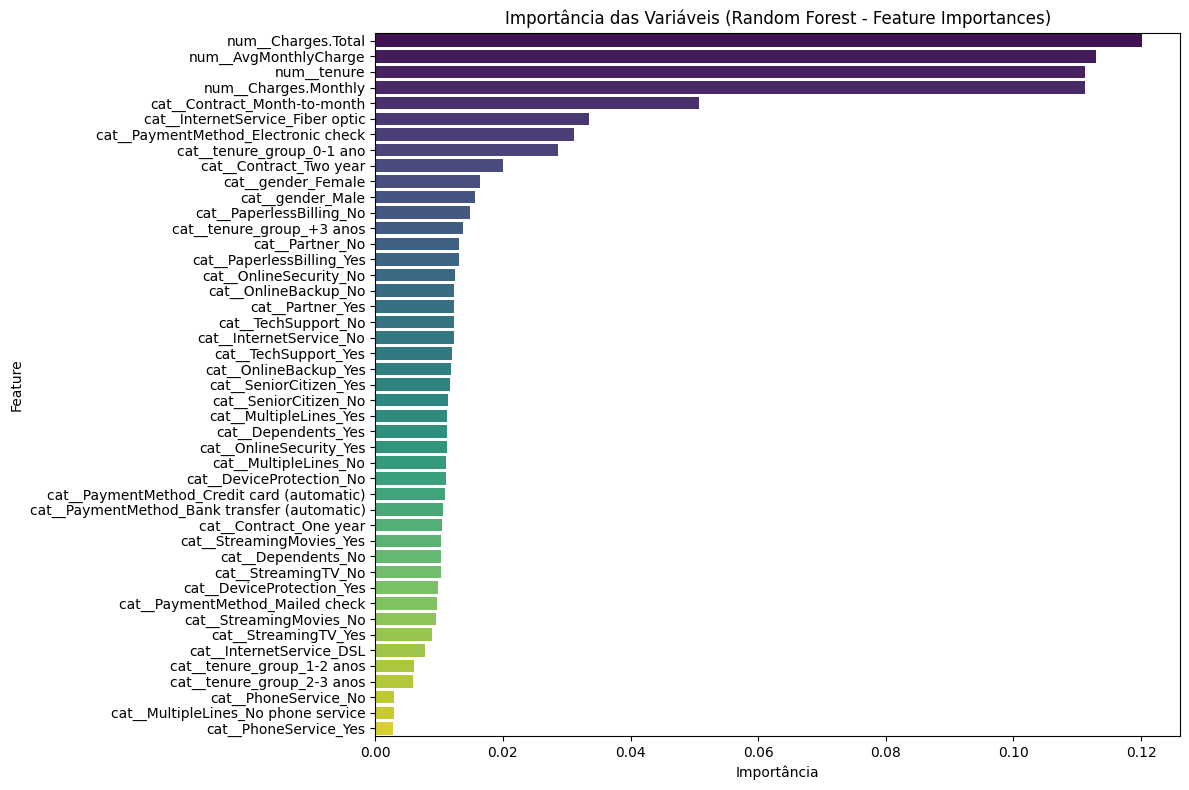


Interpretação dos resultados concluída. Importância das variáveis salva em arquivos CSV e gráficos.


In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados originais para obter os nomes das colunas
df = pd.read_csv("dados_transformados.csv")

# Remover a coluna customerID
df = df.drop("customerID", axis=1)

# Tratar valores ausentes na coluna 'Churn' (variável alvo) - remover as linhas
df.dropna(subset=["Churn"], inplace=True)

# Tratar valores ausentes em 'Charges.Total' e 'AvgMonthlyCharge' - imputar com a média
df["Charges.Total"].fillna(df["Charges.Total"].mean(), inplace=True)
df["AvgMonthlyCharge"].fillna(df["AvgMonthlyCharge"].mean(), inplace=True)

# Separar features (X) e target (y)
X = df.drop("Churn", axis=1)
y = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0) # Converter 'Yes'/'No' para 1/0

# Identificar colunas numéricas e categóricas
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# Criar pré-processadores para colunas numéricas e categóricas
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Criar o pré-processador com ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar o pré-processamento
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Obter os nomes das features após o OneHotEncoding
feature_names = preprocessor.get_feature_names_out()

# Treinar novamente os modelos para obter a importância das features
logistic_regression_model = LogisticRegression(random_state=42, solver='liblinear')
logistic_regression_model.fit(X_train_preprocessed, y_train)

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_preprocessed, y_train)

print("\nImportância das Variáveis (Regressão Logística - Coeficientes):")
coef_lr = pd.Series(logistic_regression_model.coef_[0], index=feature_names)
print(coef_lr.sort_values(ascending=False))

# Visualização da Importância das Variáveis (Regressão Logística)
plt.figure(figsize=(12, 8))
sns.barplot(x=coef_lr.sort_values(ascending=False).values, y=coef_lr.sort_values(ascending=False).index, palette='coolwarm')
plt.title('Importância das Variáveis (Regressão Logística - Coeficientes)')
plt.xlabel('Coeficiente')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('lr_feature_importance.png')
plt.show()

print("\nImportância das Variáveis (Random Forest - Feature Importances):")
importances_rf = pd.Series(random_forest_model.feature_importances_, index=feature_names)
print(importances_rf.sort_values(ascending=False))

# Visualização da Importância das Variáveis (Random Forest)
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_rf.sort_values(ascending=False).values, y=importances_rf.sort_values(ascending=False).index, palette='viridis')
plt.title('Importância das Variáveis (Random Forest - Feature Importances)')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('rf_feature_importance.png')
plt.show()

# Salvar a importância das variáveis
coef_lr.to_csv("logistic_regression_feature_importance.csv")
importances_rf.to_csv("random_forest_feature_importance.csv")

print("\nInterpretação dos resultados concluída. Importância das variáveis salva em arquivos CSV e gráficos.")


## 5. Conclusão Estratégica

Com base na análise e modelagem realizadas, podemos extrair as seguintes conclusões estratégicas sobre os principais fatores que influenciam a evasão de clientes na Telecom X:

1.  **Contratos e Permanência:** Clientes com contratos mensais e menor tempo de permanência (especialmente no primeiro ano) são os mais propensos a churn. Contratos de dois anos são um forte indicador de lealdade. **Recomendação:** Focar em estratégias de fidelização para clientes novos e incentivar a migração para contratos de longo prazo.

2.  **Serviço de Internet e Custos:** O serviço de internet de fibra óptica, embora moderno, está associado a maior churn. Além disso, mensalidades e encargos totais mais altos são preditores significativos de churn. **Recomendação:** Investigar a satisfação de clientes com fibra óptica e avaliar a competitividade dos preços. Oferecer pacotes mais flexíveis ou descontos para clientes de alto valor pode ser uma estratégia.

3.  **Método de Pagamento:** Clientes que utilizam cheque eletrônico como método de pagamento têm maior probabilidade de churn. **Recomendação:** Analisar o perfil desses clientes e considerar oferecer alternativas de pagamento mais convenientes ou incentivos para a mudança de método.

4.  **Serviços Adicionais e Suporte:** Variáveis como segurança online e suporte técnico (ou a ausência deles) também desempenham um papel, embora com menor impacto que os fatores de contrato e custo. **Recomendação:** Garantir a qualidade do suporte técnico e a percepção de valor dos serviços adicionais, pois podem ser diferenciais na retenção.

Em resumo, a Telecom X deve priorizar a retenção de clientes com contratos mensais e de curta duração, monitorar de perto a satisfação dos clientes com fibra óptica e otimizar a estrutura de preços. A implementação de programas de fidelidade, ofertas personalizadas e um serviço de atendimento ao cliente proativo, focado nos fatores identificados, pode ser fundamental para reduzir a taxa de churn e garantir o crescimento sustentável da empresa.